In [4]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Titanic DataSet

In [5]:
df=pd.read_csv("Titanic.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# separation of Continuous variable column and categorical variables

In [9]:
df_num=df.select_dtypes(include=[np.number])

# Continuous Variable columns

In [10]:
df_num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
df_cat=df.select_dtypes(include="object")

# Categorical Variable Columns

In [12]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# IMPUTATION-finding the null values

In [13]:
df_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# Applying median for all the null values

In [14]:
median_age=df_num["Age"].median()
df_num["Age"]=df_num["Age"].fillna(median_age)

In [15]:
df_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Removing the datapoints which are more than 75% and less than 25%

In [16]:
df_num["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
df_Fare=df_num[(df_num["Fare"]>7.91)&(df_num["Fare"]<31)]

# Plotting Boxplot after Removal

<Axes: ylabel='Fare'>

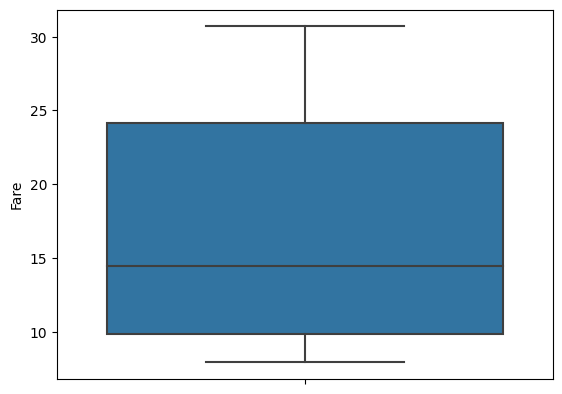

In [18]:
sns.boxplot(y=df_Fare["Fare"])

# Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
sco=sc.fit(df_Fare)

In [22]:
df_num_standard_scaler=sco.fit_transform(df_Fare)

<Axes: >

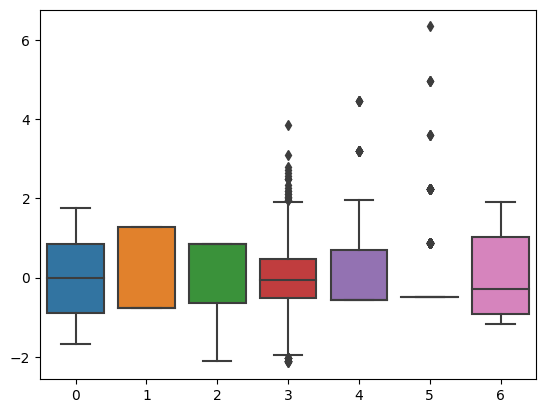

In [23]:
sns.boxplot(df_num_standard_scaler)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mms=MinMaxScaler()

In [26]:
mmso=mms.fit(df_Fare)

In [27]:
df_num_minmax_scaler=mmso.fit_transform(df_Fare)

# MinMax Scaler

<Axes: >

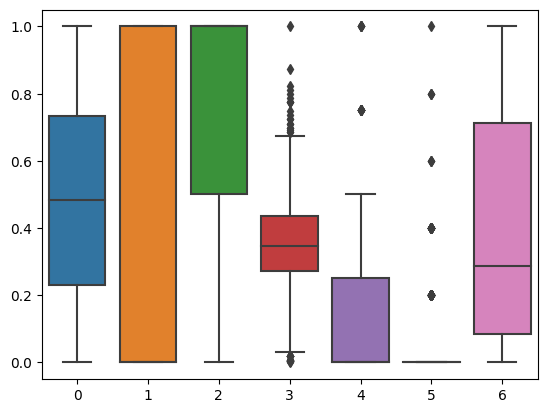

In [28]:
sns.boxplot(df_num_minmax_scaler)

# Categorical Variable Columns

In [29]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Finding Null values in Categorical variables

In [30]:
df_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

# Replacing Null values with Mode or Dropping the values if there are more null values in the columns

In [31]:
df_cat['Cabin'].fillna(df_cat['Cabin'].value_counts().idxmax(),inplace=True)

In [32]:
df_cat['Embarked'].fillna(df_cat['Embarked'].value_counts().idxmax(),inplace=True)

In [33]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


# Checking Unique Values

In [34]:
df_cat[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df_cat=df_cat.apply(le.fit_transform)

In [38]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2


In [39]:
df_Fare.shape

(443, 7)

In [40]:
df_cat.shape

(891, 5)

In [41]:
df_cat=df_cat.loc[df_Fare.index.values,:]

# Concatenate Numerical Values and Categorical Values

In [42]:
d1=pd.DataFrame(df_num_minmax_scaler,columns=df_num.columns)

In [43]:
d1.reset_index(inplace=True)

In [44]:
df_cat.reset_index(inplace=True)

In [45]:
df_Final=pd.concat([d1,df_cat],axis=1)

In [46]:
df_Final.shape

(443, 14)

# Final DataSet

In [47]:
df_Final

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,index,Name,Sex,Ticket,Cabin,Embarked
0,0,0.000000,1.0,1.0,0.321438,0.00,0.0,0.000000,2,353,0,669,47,2
1,1,0.002255,0.0,1.0,0.434531,0.00,0.0,0.005489,4,15,1,472,47,2
2,2,0.003382,0.0,1.0,0.346569,0.00,0.0,0.023420,5,554,1,275,47,1
3,3,0.005637,0.0,1.0,0.019854,0.75,0.2,0.577494,7,624,1,395,47,2
4,4,0.006764,1.0,1.0,0.334004,0.00,0.4,0.140895,8,412,0,344,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,438,0.995490,0.0,1.0,0.484795,0.00,1.0,0.931017,885,684,0,480,47,1
439,439,0.996618,0.0,0.5,0.334004,0.00,0.0,0.222873,886,548,1,101,47,2
440,440,0.997745,1.0,0.0,0.233476,0.00,0.0,0.969443,887,303,0,14,30,2
441,441,0.998873,0.0,1.0,0.346569,0.25,0.4,0.681794,888,413,0,675,47,2


# Model Training

In [48]:
Y=df_Final['Survived']

In [49]:
X=df_Final.drop(['Survived'],axis=1)

# Spliting the Data for Training(70%) and Testing(30%)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

# LogisticRegression Training Score

In [51]:
from sklearn.linear_model import LogisticRegression
lonreg=LogisticRegression()
lm=lonreg.fit(X_train,y_train)
lm.score(X_train,y_train)

0.8

# DecisionTreeClassifier Training Score

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1=dtr.fit(X_train,y_train)
dt1.score(X_train,y_train)

0.8741935483870967

# RandomForestClassifier Training Score

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=3)
rt1=rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.864516129032258

# Model Validation

In [54]:
from sklearn.metrics import accuracy_score, r2_score

# LogisticRegression Testing Score

In [55]:
lm_y_pred=lm.predict(X_test)
accuracy_score(y_test,lm_y_pred)

0.6917293233082706

# DecisionTreeClassifier Testing Score

In [56]:
dt_y_pred=dt1.predict(X_test)
accuracy_score(y_test,dt_y_pred)

0.6917293233082706

# RandomForestClassifier Testing Score

In [57]:
rf_y_pred=rf.predict(X_test)
accuracy_score(y_test,rf_y_pred)

0.706766917293233